In [1]:
import pandas as pd

In [4]:
arr=pd.read_csv('../music/experiment/ArraytrackResults.txt', delimiter='\t')

In [5]:
arr.head()

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
0,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,1,30
1,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,1,10
2,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,0,30
3,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,0,10
4,8,1,1,8.3404,16.5439,39.6584,39.7367,0.049013,0.078258,999.0,999.0,1,30


In [6]:
arr

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
0,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,1,30
1,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,1,10
2,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,0,30
3,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,0,10
4,8,1,1,8.3404,16.5439,39.6584,39.7367,0.049013,0.078258,999.0,999.0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,4,2,10000,10.9094,7.0777,-59.0642,-60.3400,0.275680,1.275800,999.0,999.0,0,10
159996,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,1,30
159997,4,1,10000,10.9094,7.0777,-59.0642,-60.2600,0.171270,1.195800,999.0,999.0,1,10
159998,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,0,30


In [7]:
len(arr[arr.errorAngle > 5])

24582

In [8]:
ori=pd.read_csv('../music/experiment/OrionResults.txt', delimiter='\t')

In [9]:
ori.head()

,ant,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,packetNum,packetPerSpec,bandwidth,decimation
0,8,1,8.3404,16.5439,39.6584,39.6733,0.070373,0.014925,-54.1333,2.8215,10,2,40,0
1,8,1,8.3404,16.5439,39.6584,39.7200,0.044721,0.061591,-55.6200,1.8116,10,2,40,0
2,8,1,8.3404,16.5439,39.6584,39.8167,0.101990,0.158260,-15.1333,3.6398,10,1,40,0
3,8,1,8.3404,16.5439,39.6584,39.8100,0.128670,0.151590,-0.9100,3.3044,10,1,40,0
4,8,1,8.3404,16.5439,39.6584,39.8733,0.070373,0.214920,-51.6000,2.9367,10,2,40,1


In [10]:
len(ori[ori.errorAngle > 0])

640000

In [11]:
len(ori[ori.errorAngle > 5])

139530

In [12]:
ori_gr=ori.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [13]:
pd.DataFrame(ori_gr.groupby(by=['ant', 'bandwidth', 'packetNum', 'packetPerSpec', 'decimation']).mean())

errorAngle
ant bandwidth packetNum packetPerSpec decimation            
4   20        10        1             0            17.923508
                                      1            18.593041
                        2             0            17.409769
                                      1            18.659894
    40        10        1             0            13.799084
                                      1            15.306967
                        2             0            13.591583
                                      1            15.374555
8   20        10        1             0            13.186920
                                      1            13.986660
                        2             0            13.478583
                                      1            14.158947
    40        10        1             0            11.206132
                                      1            11.919342
                        2             0            11.921161
                                      1            12.603290

In [14]:
arr_gr=arr.drop(columns=['SNR', 'Kfactor', 'seed', 'realAngle', 'estAngle', 'stdAngle', 'nextAngle', 'stdNextAngle'])

In [15]:
arr[arr.nextAngle != 999]

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
64,8,3,5,4.4399,19.6148,66.7318,66.6300,0.180330,0.101820,-47.3533,11.7742,1,30
65,8,3,5,4.4399,19.6148,66.7318,66.6500,0.164990,0.081815,-24.4200,10.6274,1,10
68,8,1,5,4.4399,19.6148,66.7318,66.5000,0.254610,0.231820,-23.1667,6.4460,1,30
69,8,1,5,4.4399,19.6148,66.7318,66.5800,0.265830,0.151820,-21.6500,4.8654,1,10
72,4,2,5,4.4399,19.6148,66.7318,67.2467,0.505650,0.514850,-24.5500,6.9895,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159973,8,1,9999,16.4678,5.8899,-50.6515,-50.2700,0.048305,0.381510,77.1000,2.1087,1,10
159974,8,1,9999,16.4678,5.8899,-50.6515,-50.2367,0.085029,0.414840,64.6367,38.9242,0,30
159975,8,1,9999,16.4678,5.8899,-50.6515,-50.2400,0.051640,0.411510,77.1200,2.1540,0,10
159988,8,1,10000,10.9094,7.0777,-59.0642,-59.8267,0.063968,0.762420,-4.6367,43.6980,1,30


In [16]:
pd.DataFrame(arr[(arr.errorAngle < 10) | (arr.nextAngle == 999)].groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

subArrNum         seed        SNR   Kfactor  \
ant backwSmth packetNum                                                
4   0         10          1.502204  5079.155352  10.168480  6.684266   
              30          1.501706  5077.176230  10.169560  6.684206   
    1         10          1.503084  5120.131306  10.283231  6.888828   
              30          1.503660  5112.243051  10.288916  6.883325   
8   0         10          2.005007  5058.026393  10.113986  6.646931   
              30          2.005967  5060.550094  10.125783  6.662422   
    1         10          2.009787  5084.172065  10.242925  6.794700   
              30          2.010490  5070.069590  10.243681  6.774592   

                         realAngle  estAngle  stdAngle  errorAngle  \
ant backwSmth packetNum                                              
4   0         10         -0.051097 -0.301325  3.376491    7.470219   
              30         -0.081086 -0.332962  3.801780    7.484920   
    1         10         -0.203720 -0.240321  2.254888    4.865046   
              30         -0.203896 -0.240504  2.533275    4.864219   
8   0         10         -0.323134 -0.365862  1.271735    3.055382   
              30         -0.279831 -0.347731  1.464986    3.009736   
    1         10         -0.371571 -0.321383  0.869167    1.829250   
              30         -0.436550 -0.372342  0.978595    1.790986   

                          nextAngle  stdNextAngle  
ant backwSmth packetNum                            
4   0         10         735.869219    739.675302  
              30         736.240202    740.373166  
    1         10         392.764624    399.571713  
              30         392.516593    399.881694  
8   0         10         431.283093    436.510534  
              30         432.751675    438.680479  
    1         10         163.264497    169.065414  
              30         162.996337    169.787224

In [17]:
pd.DataFrame(arr_gr.groupby(by=['ant', 'backwSmth', 'packetNum']).mean())

subArrNum  errorAngle
ant backwSmth packetNum                       
4   0         10               1.5    9.653352
              30               1.5    9.677044
    1         10               1.5    9.793960
              30               1.5    9.753982
8   0         10               2.0    5.635112
              30               2.0    5.763855
    1         10               2.0    6.744307
              30               2.0    6.769971

In [18]:
pd.DataFrame(ori[(ori.errorAngle < 10) | (ori.nextAngle == 999)].groupby(by=['ant', 'bandwidth', 'packetPerSpec', 'decimation', 'packetNum']).mean()).drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'estAngle', 'nextAngle', 'stdNextAngle'])

stdAngle  errorAngle
ant bandwidth packetPerSpec decimation packetNum                      
4   20        1             0          10         1.655274    2.095977
                            1          10         1.581946    2.069431
              2             0          10         1.311666    2.018757
                            1          10         1.269635    1.989878
    40        1             0          10         1.259224    1.654035
                            1          10         1.161099    1.620407
              2             0          10         0.948262    1.636753
                            1          10         0.906127    1.602074
8   20        1             0          10         0.486119    0.840135
                            1          10         0.465269    0.844772
              2             0          10         0.527009    0.889458
                            1          10         0.469452    0.880072
    40        1             0          10         0.494872    0.802487
                            1          10         0.419531    0.790507
              2             0          10         0.510969    0.832025
                            1          10         0.397244    0.802742

In [19]:
arr

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum
0,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,1,30
1,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,1,10
2,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,0,30
3,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,0,10
4,8,1,1,8.3404,16.5439,39.6584,39.7367,0.049013,0.078258,999.0,999.0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,4,2,10000,10.9094,7.0777,-59.0642,-60.3400,0.275680,1.275800,999.0,999.0,0,10
159996,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,1,30
159997,4,1,10000,10.9094,7.0777,-59.0642,-60.2600,0.171270,1.195800,999.0,999.0,1,10
159998,4,1,10000,10.9094,7.0777,-59.0642,-60.2733,0.228840,1.209100,999.0,999.0,0,30


In [124]:
pd.set_option('display.max_rows', 30)

In [21]:
arr['errorNextAngle'] = abs(arr.nextAngle - arr.realAngle)

In [22]:
arr[arr.errorNextAngle < arr.errorAngle]

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum,errorNextAngle
160,8,3,11,3.60540,24.5991,-86.4945,4.8433,13.95030,91.33780,-80.0967,19.8625,1,30,6.3978
161,8,3,11,3.60540,24.5991,-86.4945,12.4700,11.74370,98.96450,-71.5200,32.9464,1,10,14.9745
164,8,1,11,3.60540,24.5991,-86.4945,1.5167,14.13890,88.01110,-13.1433,14.6698,1,30,73.3512
741,8,1,47,2.26980,99.0412,85.4070,-20.4800,5.08700,105.88700,26.2000,5.9410,1,10,59.2070
744,4,2,47,2.26980,99.0412,85.4070,-2.8967,24.65730,88.30360,60.8700,43.7581,1,30,24.5370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159505,8,3,9970,0.66916,7.7876,71.9558,71.4800,1.67250,0.47581,72.3600,1.8350,1,10,0.4042
159952,8,3,9998,3.87090,6.9865,59.7182,57.9233,1.14400,1.79490,60.3767,3.8096,1,30,0.6585
159953,8,3,9998,3.87090,6.9865,59.7182,58.0400,0.96632,1.67820,59.9800,3.5178,1,10,0.2618
159956,8,1,9998,3.87090,6.9865,59.7182,58.1067,1.31780,1.61160,58.8133,2.4425,1,30,0.9049


In [193]:
pd.set_option('display.max_columns', None)

In [24]:
arr.head()

,ant,subArrNum,seed,SNR,Kfactor,realAngle,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,backwSmth,packetNum,errorNextAngle
0,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,1,30,959.3416
1,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,1,10,959.3416
2,8,3,1,8.3404,16.5439,39.6584,39.6833,0.059209,0.024925,999.0,999.0,0,30,959.3416
3,8,3,1,8.3404,16.5439,39.6584,39.6900,0.073786,0.031591,999.0,999.0,0,10,959.3416
4,8,1,1,8.3404,16.5439,39.6584,39.7367,0.049013,0.078258,999.0,999.0,1,30,959.3416


In [25]:
channel=arr[['seed', 'SNR', 'realAngle', 'Kfactor']]

In [26]:
channel.drop_duplicates().reset_index(drop=True)

,seed,SNR,realAngle,Kfactor
0,1,8.34040,39.6584,16.5439
1,2,8.71990,-85.3333,56.1674
2,3,11.01600,37.4666,18.0646
3,4,19.34060,8.5018,61.1429
4,5,4.43990,66.7318,19.6148
...,...,...,...,...
9995,9996,13.39270,-18.1349,6.9064
9996,9997,0.83512,16.9031,5.7963
9997,9998,3.87090,59.7182,6.9865
9998,9999,16.46780,-50.6515,5.8899


In [2]:
sp=pd.read_csv('SpotfiClusters/SpotfiResults.txt', delimiter='\t')

In [3]:
sp.head()

,ant,seed,smoothing,backw,packetNum,packetPerSpec,bandwidth,decimation,clSize1,stdA1,...,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5
0,8,1,0,0,30,1,20,0,30,0.0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,8,1,0,0,30,1,20,1,30,0.0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,8,1,0,0,30,2,20,0,15,0.0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,8,1,0,0,30,2,20,1,15,0.0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,8,1,0,0,10,1,20,0,10,0.0,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [28]:
spotfi=sp.merge(channel)

In [201]:
spotfi['errorAngle'] = abs(spotfi.meanA1 - spotfi.realAngle)
spotfi['errorNextAngle'] = abs(spotfi.realAngle - spotfi.meanA2)
spotfi['errorNextNextAngle'] = abs(spotfi.realAngle - spotfi.meanA3)

In [30]:
spotfi.head()

,ant,seed,smoothing,backw,packetNum,packetPerSpec,bandwidth,decimation,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,SNR,realAngle,Kfactor,errorAngle
0,8,1,0,0,30,1,20,0,30,0.0,0.0,40.0,44.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.5439,0.3416
1,8,1,0,0,30,1,20,0,30,0.0,0.0,40.0,44.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.5439,0.3416
2,8,1,0,0,30,1,20,0,30,0.0,0.0,40.0,44.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.5439,0.3416
3,8,1,0,0,30,1,20,0,30,0.0,0.0,40.0,44.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.5439,0.3416
4,8,1,0,0,30,1,20,0,30,0.0,0.0,40.0,44.0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.5439,0.3416


In [37]:
pd.set_option('display.max_rows', None)
gr_sp = pd.DataFrame(spotfi[spotfi.errorAngle < 10].groupby(by=['ant', 'smoothing', 'backw', 'bandwidth', 'packetPerSpec', 'decimation', 'packetNum']).mean()).drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'clSize1', 'stdA1', 'stdD1', 'meanA1', 'meanD1', 'clSize2', 'stdA2', 'stdD2', 'meanA2', 'meanD2', 'clSize3', 'stdA3', 'stdD3', 'meanA3', 'meanD3', 'clSize4', 'stdA4', 'stdD4', 'meanA4', 'meanD4', 'clSize5', 'stdA5', 'stdD5', 'meanA5', 'meanD5'])

In [39]:
gr_sp.head()

errorAngle
ant smoothing backw bandwidth packetPerSpec decimation packetNum            
4   0         0     20        1             0          10           2.419647
                                                       30           2.511076
                                            1          10           2.478180
                                                       30           2.522200
                              2             0          10           2.397640

In [261]:
len(arr[(abs(arr.realAngle) < 10) & (arr.seed < 2500)].seed.unique())

302

In [262]:
len(spotfi[(abs(spotfi.realAngle) < 10) & (spotfi.seed < 2500)].seed.unique())

302

In [263]:
sp_er = spotfi[(abs(spotfi.realAngle) < 10) & (spotfi.seed < 2500) & (spotfi.ant == 8) & (spotfi.smoothing == 1) & (spotfi.backw == 1) & (spotfi.packetNum == 10) & (spotfi.packetPerSpec == 1) & (spotfi.bandwidth == 20) & (spotfi.decimation == 0)].drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'clSize1', 'stdA1', 'stdD1', 'meanA1', 'meanD1', 'clSize2', 'stdA2', 'stdD2', 'meanA2', 'meanD2', 'clSize3', 'stdA3', 'stdD3', 'meanA3', 'meanD3', 'clSize4', 'stdA4', 'stdD4', 'meanA4', 'meanD4', 'clSize5', 'stdA5', 'stdD5', 'meanA5', 'meanD5', 'ant', 'smoothing', 'backw', 'packetNum', 'packetPerSpec', 'bandwidth', 'decimation']).errorAngle

In [264]:
import numpy as np

In [265]:
data_sorted = np.sort(sp_er)

In [266]:
p = 1. * np.arange(len(data_sorted)) / (len(data_sorted) - 1)

In [267]:
p

array([  0.00000000e+00,   2.06996481e-04,   4.13992962e-04, ...,
         9.99586007e-01,   9.99793004e-01,   1.00000000e+00])

In [268]:
import matplotlib.pyplot as plt

Text(0,0.5,'$p$')

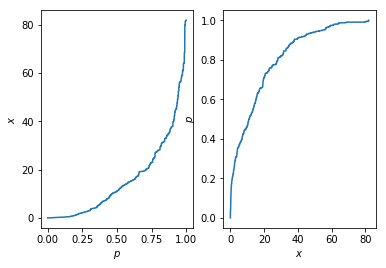

In [269]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [125]:
ori

,ant,seed,SNR,Kfactor,realAngle,...,stdNextAngle,packetNum,packetPerSpec,bandwidth,decimation
0,8,1,8.3404,16.5439,39.6584,...,2.8215,10,2,40,0
1,8,1,8.3404,16.5439,39.6584,...,1.8116,10,2,40,0
2,8,1,8.3404,16.5439,39.6584,...,3.6398,10,1,40,0
3,8,1,8.3404,16.5439,39.6584,...,3.3044,10,1,40,0
4,8,1,8.3404,16.5439,39.6584,...,2.9367,10,2,40,1
...,...,...,...,...,...,...,...,...,...,...,...
639995,4,10000,10.9094,7.0777,-59.0642,...,30.5201,10,1,20,0
639996,4,10000,10.9094,7.0777,-59.0642,...,23.2783,10,2,20,1
639997,4,10000,10.9094,7.0777,-59.0642,...,8.8055,10,2,20,1
639998,4,10000,10.9094,7.0777,-59.0642,...,28.4958,10,1,20,1


In [275]:
ori_er = ori[(abs(ori.realAngle) < 10) & (ori.seed < 2500)  & (ori.ant == 8) & (ori.packetNum == 10) & (ori.packetPerSpec == 1) & (ori.bandwidth == 20) & (ori.decimation == 0)].drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'ant', 'packetNum', 'packetPerSpec', 'bandwidth', 'decimation']).errorAngle

In [276]:
ori_sorted = np.sort(ori_er)

In [277]:
p = 1. * np.arange(len(ori_sorted)) / (len(ori_sorted) - 1)

In [278]:
p

array([  0.00000000e+00,   8.28500414e-04,   1.65700083e-03, ...,
         9.98342999e-01,   9.99171500e-01,   1.00000000e+00])

Text(0,0.5,'$p$')

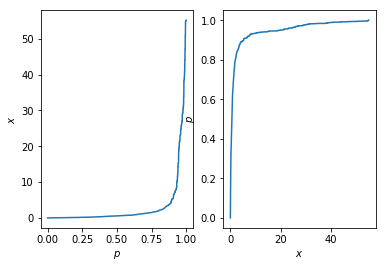

In [279]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, ori_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(ori_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [270]:
arr_er = arr[(abs(arr.realAngle) < 10) & (arr.seed < 2500) & (arr.ant == 8) & (arr.packetNum == 10)].drop(columns=['seed', 'SNR', 'Kfactor', 'realAngle', 'ant', 'packetNum']).errorAngle

In [271]:
arr_sorted = np.sort(arr_er)

In [272]:
p = 1. * np.arange(len(arr_sorted)) / (len(arr_sorted) - 1)

In [273]:
p

array([  0.00000000e+00,   8.28500414e-04,   1.65700083e-03, ...,
         9.98342999e-01,   9.99171500e-01,   1.00000000e+00])

Text(0,0.5,'$p$')

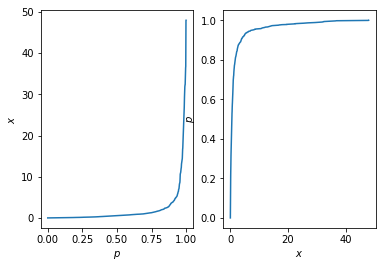

In [274]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, arr_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(arr_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

In [213]:
spotfi[spotfi.errorAngle > spotfi.errorNextAngle]

,ant,seed,smoothing,backw,packetNum,packetPerSpec,bandwidth,decimation,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,SNR,realAngle,Kfactor,errorAngle,errorNextAngle,errorNextNextAngle


In [214]:
spotfi[~spotfi.isnull().errorNextAngle]

,ant,seed,smoothing,backw,packetNum,packetPerSpec,bandwidth,decimation,clSize1,stdA1,stdD1,meanA1,meanD1,clSize2,stdA2,stdD2,meanA2,meanD2,clSize3,stdA3,stdD3,meanA3,meanD3,clSize4,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,SNR,realAngle,Kfactor,errorAngle,errorNextAngle,errorNextNextAngle
208,8,1,0,1,10,1,20,1,5,0.00,0.000,40.0,44.000,5,0.000,0.000,40.000,43.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.54390,0.3416,0.3416,NaN
209,8,1,0,1,10,1,20,1,5,0.00,0.000,40.0,44.000,5,0.000,0.000,40.000,43.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.54390,0.3416,0.3416,NaN
210,8,1,0,1,10,1,20,1,5,0.00,0.000,40.0,44.000,5,0.000,0.000,40.000,43.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.54390,0.3416,0.3416,NaN
211,8,1,0,1,10,1,20,1,5,0.00,0.000,40.0,44.000,5,0.000,0.000,40.000,43.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.54390,0.3416,0.3416,NaN
212,8,1,0,1,10,1,20,1,5,0.00,0.000,40.0,44.000,5,0.000,0.000,40.000,43.000,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.3404,39.6584,16.54390,0.3416,0.3416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763771,4,2726,1,1,10,2,20,1,6,7.12,8.424,36.5,45.833,3,0.577,0.577,58.333,71.667,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.2595,44.9919,0.56002,8.4919,13.3411,NaN
2763772,4,2726,1,1,10,2,20,1,6,7.12,8.424,36.5,45.833,3,0.577,0.577,58.333,71.667,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.2595,44.9919,0.56002,8.4919,13.3411,NaN
2763773,4,2726,1,1,10,2,20,1,6,7.12,8.424,36.5,45.833,3,0.577,0.577,58.333,71.667,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.2595,44.9919,0.56002,8.4919,13.3411,NaN
2763774,4,2726,1,1,10,2,20,1,6,7.12,8.424,36.5,45.833,3,0.577,0.577,58.333,71.667,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,8.2595,44.9919,0.56002,8.4919,13.3411,NaN
